 ## Introduction 
    
<font color = "blue">
Content:

1. [Loading and Checking Data](#1)
2. [Data Description](#2)
3. [Determination Of Numerical Values](#3)
4. [Data Query and Visualization](#4)
    * [Histogram chart of women killed between January 2008 and August 2020](#5)
    * [How They Were Killed Pie-Chart](#6)
    * [Protection Order Pie-Chart](#7)
    * [Status Of Killer Pie-Chart](#8)
    * [By Whom Bar-Plot](#9)
        * [Women Who Were Killed By Relatives](#10)
        * [Women Who Were Killed By People With Emotional Relationship](#11)
    * [According To Regions Rates In Turkey Pie-Chart](#12)
    * [According To City Rates In Turkey Pie-Chart](#13)
    * [According To Reason Rates Of Women Were Killed Pie-Chart](#14) 
5. [Resources](#15)
6. [Teammate](#16)
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/femicide-in-turkey-20082020-english-dataset/femicide_in_turkey_2008_2020_englishdataset.csv


<a id = '1'> </a>
## Loading and Checking Data

In [2]:
data = pd.read_csv('/kaggle/input/femicide-in-turkey-20082020-english-dataset/femicide_in_turkey_2008_2020_englishdataset.csv')
data.head()

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2008.0
1,2,Adana,NaN,01/12/2008,No,Undetectable,NaN,Boyfriend,NaN,Firearm,NaN,NaN,Suicide,2008.0
2,3,Adana,Underage,01/02/2008,No,Undetectable,NaN,Father,NaN,Assault,NaN,NaN,Prisoner,2008.0
3,4,Adana,NaN,01/04/2008,No,Undetectable,NaN,Ex Boyfriend,NaN,Firearm,NaN,NaN,Suicide,2008.0
4,5,Ankara,NaN,01/12/2008,Undetectable,Undetectable,NaN,Undetectable,NaN,Undetectable,NaN,NaN,Undetectable,2008.0


In [3]:
data = data.replace({"^\s*|\s*$":""}, regex=True)
year = data['year'] = data['year'].astype('int') 
data['city'] = data['city'].astype('str')
data = data.replace('Cousen','Cousin')

In [4]:
data.columns

Index(['id', 'city', 'age', 'date', 'protectionorder', 'why1', 'why2',
       'killer1', 'killer2', 'killingway1', 'killingway2', 'killingway3',
       'statusofkiller', 'year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3111 non-null   int64 
 1   city             3111 non-null   object
 2   age              1320 non-null   object
 3   date             3111 non-null   object
 4   protectionorder  3109 non-null   object
 5   why1             3110 non-null   object
 6   why2             70 non-null     object
 7   killer1          3108 non-null   object
 8   killer2          9 non-null      object
 9   killingway1      3111 non-null   object
 10  killingway2      67 non-null     object
 11  killingway3      6 non-null      object
 12  statusofkiller   1769 non-null   object
 13  year             3111 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 340.4+ KB


In [6]:
data.tail()

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
3106,3111,Van,Adult,19/01/2013,No,Undetectable,NaN,Husband,NaN,Asphyxiate,NaN,NaN,Prisoner,2013
3107,3112,Istanbul,Adult,22/01/2013,Yes,Undetectable,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2013
3108,3113,Kars,Adult,23/01/2013,No,Jealousy,NaN,Ex Husband,NaN,Firearm,NaN,NaN,NaN,2013
3109,3114,Samsun,Adult,26/02/2013,No,Undetectable,NaN,Ex Boyfriend,NaN,Firearm,NaN,NaN,Prisoner,2013
3110,3115,Hatay,Adult,02/03/2013,No,Undetectable,NaN,Ex Husband,NaN,Firearm,NaN,NaN,Undetectable,2013


<a id = '2'></a> 
## *Data Description*

<font color = "red">Explanation:</font>
<font color = "blue">The data are taken from news sites on the internet and cannot be 100% accurate. Some data are unfortunately incomplete and not available since they were not made public later. The dataset was created by Yağmur Sezen Demir and Büşra Durak by pulling the data on the internet into Excel via Selenium.</font>

<font color = "blue"> There may be changes in the data due to the fact that some expressions used in Turkish are the same or not at all in English. For example, in Turkish, the phrase 'Religious Wedding Husband' is taken as her husband in English, but not her husband in Turkish. </font>
- *id: identifiger*
- *city: which city she was killed*
- *age: adult / underage*
- *date: when it happened*
- *protectionorder: protection order (yes,no,undetectable)*
- *why1, why2: reason of being killed*
- *killer1, killer2: by whom*
- *killingway1, killingway2, killingway3: how she died*
- *statusofkiller: status of killer*
- *year: which year it happened*

<a id = '3'> </a>
## Determination Of Numerical Values

In [7]:
whichyear = data.year.value_counts().head(13).sort_index()
whichyear

2008     65
2009    123
2010    194
2011    121
2012    139
2013    229
2014    290
2015    295
2016    282
2017    348
2018    403
2019    427
2020    194
Name: year, dtype: int64

<font color = "#000045"><b> The data above shows how many women were killed in which year. A total of 194 women were killed in the first 8 months of 2020. </b>

In [8]:
bywhom = data.killer1.value_counts()
bywhom.head(10)

Husband                      1040
Undetectable                  504
Boyfriend                     306
Someone She Knows             275
Ex Husband                    179
Son                           113
Father                        106
Someone She Does Not Know      90
Brother                        88
Ex Boyfriend                   84
Name: killer1, dtype: int64

<font color = "#000045"><b> The data given shows who killed the victims between 2008 and 2020. Except for unspecified data, a total of 1040 women were killed by their husbands. </b>

In [9]:
data.statusofkiller.value_counts().head(7)

Prisoner                   990
Undetectable               294
Suicide                    235
Investigation Continues    123
Wanted                      88
Escape                      37
Free                         2
Name: statusofkiller, dtype: int64

<font color = "#000045"><b> The above data show the situation of the murderers. </b>

<a id = '4' > </a>
   ## Data Query and Visualization

In [10]:
data[
    ((data.killer1 == 'Husband') | (data.killer2 == 'Husband')) &
    ((data.killingway1 == 'Firearm') | (data.killingway2 == 'Firearm')|(data.killingway3 == 'Firearm'))
]

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Adult,01/02/2008,Undetectable,Because something that a man wanted did not ha...,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2008
10,11,Bingol,Adult,04/03/2008,No,Controversy,NaN,Husband,NaN,Firearm,NaN,NaN,Prisoner,2008
18,19,Gaziantep,Adult,07/05/2008,No,Undetectable,NaN,Husband,NaN,Firearm,NaN,NaN,Undetectable,2008
27,28,Istanbul,Adult,10/07/2008,No,Controversy,NaN,Husband,NaN,Firearm,NaN,NaN,Suicide,2008
31,32,Sinop,NaN,17/05/2008,No,Undetectable,NaN,Husband,NaN,Firearm,NaN,NaN,Prisoner,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,3097,Istanbul,Adult,06/12/2012,No,Controversy,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2012
3095,3100,Undetectable,Adult,31/12/2012,No,Cheating Suspicion,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2012
3098,3103,Kayseri,Adult,18/12/2012,No,Controversy,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2012
3099,3104,Diyarbakir,Adult,31/12/2012,No,Undetectable,NaN,Husband,NaN,Firearm,NaN,NaN,NaN,2012


<font color = "#000045"> <b> In the query written above, those killed by her husband with firearms between 2008-2020 are listed. </b>

<a id = "5"></a>
<font color = "#800000">
### *Histogram chart of women killed between January 2008 and August 2020*

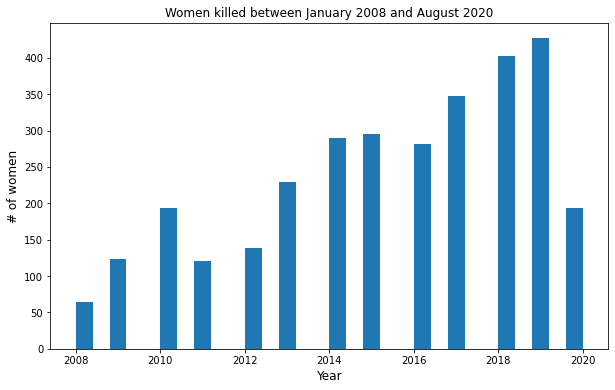

In [11]:
accordingtoyear =data.year.plot(kind = 'hist' , bins = 30 , figsize = (10,6) , range = (2008 , 2020) , label = 'Yil' )
accordingtoyear.set_title("Women killed between January 2008 and August 2020" , fontsize = 12)
accordingtoyear.set_xlabel("Year", fontsize = 12)
accordingtoyear.set_ylabel("# of women", fontsize = 12)
plt.show()

<a id = "6"></a>
<font color = "#800000">
### *How They Were Killed Pie-Chart*

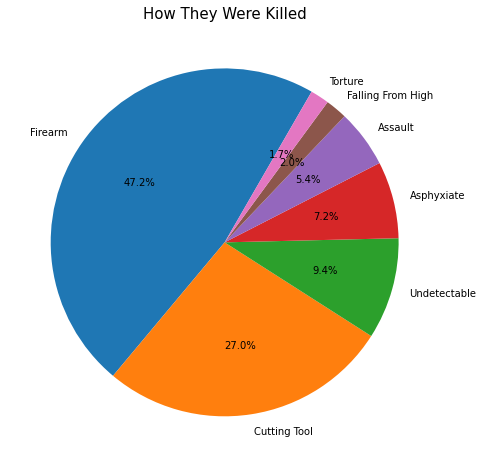

In [12]:
howdied = data.killingway1.value_counts().head(7)
howdiedgraph = howdied.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
howdiedgraph.set_title("How They Were Killed" , fontsize = 15)
howdiedgraph.set_ylabel("" , fontsize = 15)
plt.show()

<font color = '#000045'> <b> At the first 7 killings in the data, it is seen that almost half of them were firearms. </b> </font>

<a id = "7"></a>
<font color = "#800000">
### *Protection Order Pie-Chart*

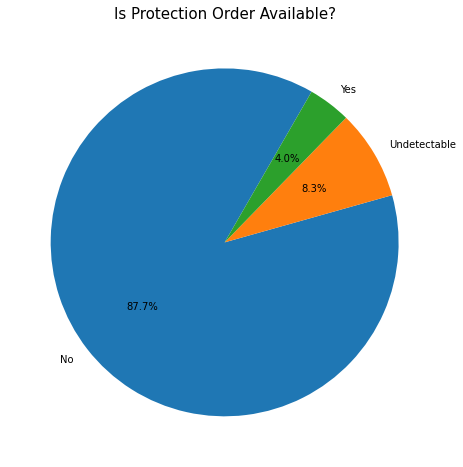

In [13]:
protection = data.protectionorder.value_counts().head(3)
protectionordergraph = protection.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
protectionordergraph.set_title("Is Protection Order Available?" , fontsize = 15)
protectionordergraph.set_ylabel("" , fontsize = 15)
plt.show()

<a id = "8"></a>
<font color = "#800000">
### *Status Of Killer Pie-Chart*

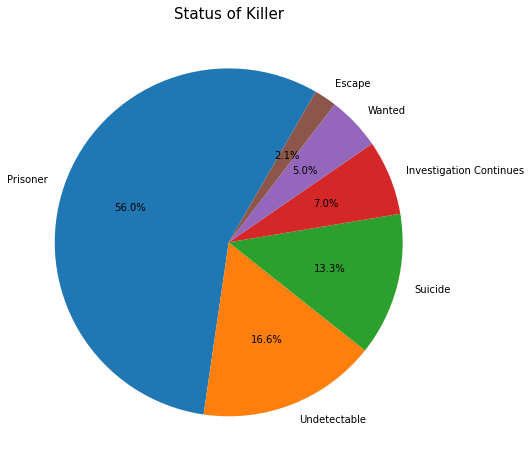

In [14]:
killerstatus = data.statusofkiller.value_counts().head(6)
killerstatusgraph = killerstatus.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
killerstatusgraph.set_title("Status of Killer" , fontsize = 15)
killerstatusgraph.set_ylabel("" , fontsize = 15)
plt.show()

<a id = "9"></a>
<font color = "#800000">
### *By Whom Bar-Plot*

In [15]:
family3 = data[(data['killer1'] == 'Father') | (data['killer1'] == 'Mother') ]
family3filter = family3[['year','killer1']]
family3filter.year.value_counts().head(13).sort_index()

2008     4
2009     4
2010    10
2011     4
2013     8
2014     7
2015    13
2016    19
2017    12
2018    12
2019     7
2020     7
Name: year, dtype: int64

<a id = "10"></a>
### *Women Who Were Killed By Relatives*

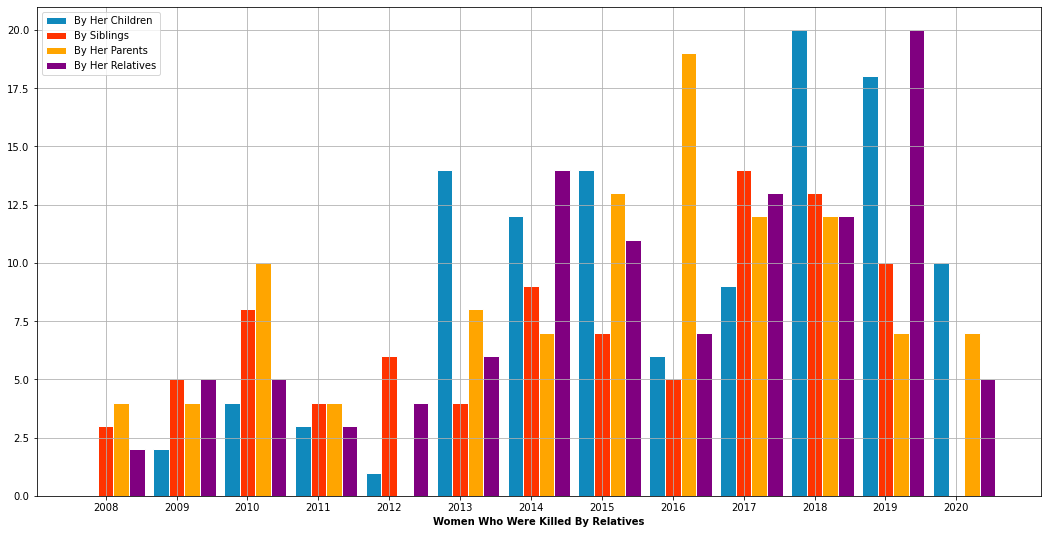

In [16]:
# By her son and her daughter
family1 = data[(data['killer1'] == 'Son') | (data['killer1'] == 'Daughter')]
family1filter = family1[['year','killer1']]
family1filter.year.value_counts().head(13).sort_index()
listfamily1 = list(family1filter.year.value_counts().head(13).sort_index())
listfamily1.insert(0,0) #There is no value in 2008, so we added zero value in this year.
#By her brother, sibling and sister
family2 = data[(data['killer1'] == 'Brother') | (data['killer1'] == 'Sibling')| (data['killer1'] == 'Sister') ]
family2filter = family2[['year','killer1']]
family2filter.year.value_counts().head(13).sort_index()
listfamily2 = list(family2filter.year.value_counts().head(13).sort_index())
listfamily2.append(0)
#By her mom and dad
family3 = data[(data['killer1'] == 'Father') | (data['killer1'] == 'Mother') ]
family3filter = family3[['year','killer1']]
family3filter.year.value_counts().head(13).sort_index()
listfamily3 = list(family3filter.year.value_counts().head(13).sort_index())
listfamily3.insert(4,0)
#By her grandson, nephew, uncle, cousin and relatives
family4 = data[(data['killer1'] == 'Grandson' ) | (data['killer1'] == 'Nephew') | (data['killer1'] == 'Uncle') |(data['killer1'] == 'Cousin') | (data['killer1'] == 'Relative')]
family4filter = family4[['year','killer1']]
family4filter.year.value_counts().head(13).sort_index()
listfamily4 = list(family4filter.year.value_counts().head(13).sort_index())
#The data is inserted a list to draw a graph
data_1 = []
data_1.append(listfamily1)
data_1.append(listfamily2)
data_1.append(listfamily3)
data_1.append(listfamily4) 

barWidth = 0.22
r1 = np.arange(len(data_1[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#make the plot and show 
plt.figure(figsize=(18,9))
plt.grid(zorder = 0)
plt.bar(r1, data_1[0], color='#1089bc', width=barWidth, edgecolor='white', label='By Her Children')
plt.bar(r2, data_1[1] , color='#ff3300', width=barWidth, edgecolor='white', label='By Siblings')
plt.bar(r3, data_1[2], color='#ffa500', width=barWidth, edgecolor='white', label='By Her Parents ')
plt.bar(r4, data_1[3], color='purple', width=barWidth, edgecolor='white', label='By Her Relatives')
plt.xlabel('Women Who Were Killed By Relatives', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(data_1[0]))], ['2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', '2016', '2017','2018', '2019', '2020'])
plt.legend()
plt.show()


<a id = "11"></a>
### *Women Who Were Killed By People With Emotional Relationship*

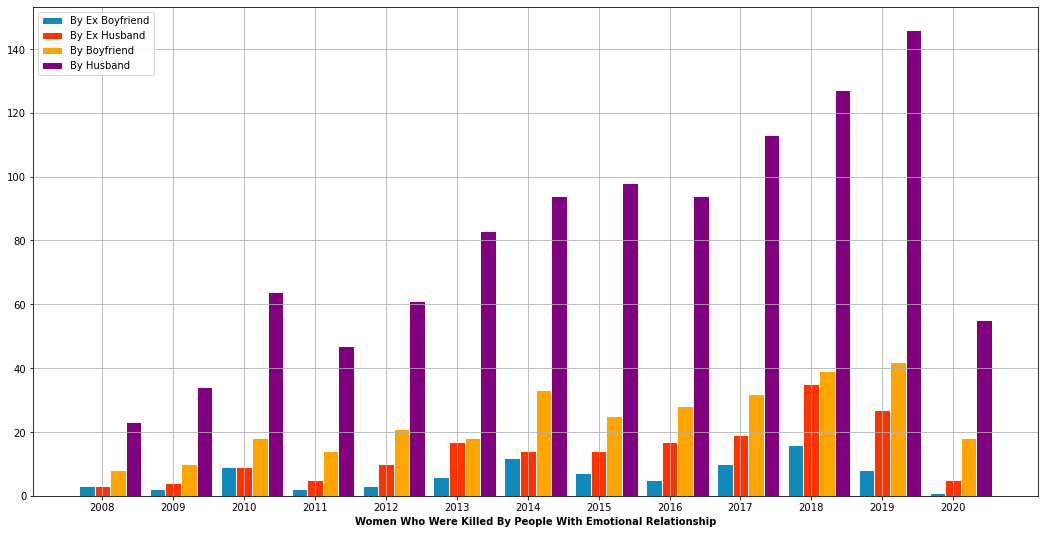

In [17]:
# By her husband
byhusband = data[data['killer1'] == 'Husband' ]
byhusbandfilter = byhusband[['year','killer1']]
byhusbandfilter.year.value_counts().head(13).sort_index()
listbyhusband = list(byhusbandfilter.year.value_counts().head(13).sort_index())
# By her ex husband
byexhusband = data[data['killer1'] == 'Ex Husband' ]
byexhusbandfilter = byexhusband[['year','killer1']]
byexhusbandfilter.year.value_counts().head(13).sort_index()
listbyexhusband = list(byexhusbandfilter.year.value_counts().head(13).sort_index())
# By her ex boyfriend
byexboyfriend = data[(data['killer1'] == 'Ex Boyfriend') ]
byexboyfriendfilter = byexboyfriend[['year','killer1']]
byexboyfriendfilter.year.value_counts().head(13).sort_index()        
listbyexboyfriend= list(byexboyfriendfilter.year.value_counts().head(13).sort_index())
#Sevgilisi Tarafından Öldürülenler
byboyfriend = data[data['killer1'] == 'Boyfriend' ]
byboyfriendfilter = byboyfriend[['year','killer1']]
byboyfriendfilter.year.value_counts().head(13).sort_index()
listbyboyfriend = list(byboyfriendfilter.year.value_counts().head(13).sort_index())

data_2 = []
data_2.append(listbyexboyfriend)
data_2.append(listbyexhusband)
data_2.append(listbyboyfriend)
data_2.append(listbyhusband)
# X axisindeki değerleri atayalım
barWidth = 0.22
r1 = np.arange(len(data_2[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#plotu oluşturalım ve görüntüleyelim
plt.figure(figsize=(18,9))
plt.grid(zorder = 0)
plt.bar(r1, data_2[0], color='#1089bc', width=barWidth, edgecolor='white', label='By Ex Boyfriend')
plt.bar(r2, data_2[1] , color='#ff3300', width=barWidth, edgecolor='white', label='By Ex Husband')
plt.bar(r3, data_2[2], color='#ffa500', width=barWidth, edgecolor='white', label='By Boyfriend')
plt.bar(r4, data_2[3], color='purple', width=barWidth, edgecolor='white', label='By Husband')
plt.xlabel('Women Who Were Killed By People With Emotional Relationship', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(data_2[0]))], ['2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', '2016', '2017','2018', '2019', '2020'])
plt.legend()
plt.show()


<a id = "12"></a>
<font color = "#800000">
## *According To Regions Rates In Turkey Pie-Chart*

In [18]:
Regions= pd.DataFrame({'MediterraneanRegion': ['Adana', 'Antalya', 'Mersin' , 'Burdur' , 'Hatay' , 'Isparta' , 'Kahramanmaras' , 'Osmaniye', '','','','','','','','','',''], 
              'AegeanRegion': ['Izmir', 'Mugla' , 'Aydin' , 'Afyonkarahisar' , 'Denizli', 'Kutahya' , 'Manisa', 'Usak','','','','','','','','','',''], 
              'MarmaraRegion' : ['Balikesir', 'Bilecik' , 'Bursa' , 'Canakkale', 'Edirne', 'Istanbul', 'Kirklareli', 'Kocaeli' , 'Izmit', 'Sakarya', 'Tekirdağ' ,'Yalova','','','','','',''],
              'EastAnatoliaRegion' : ['Agri', 'Ardahan', 'Bingol', 'Bitlis', 'Elazig', 'Erzincan' , 'Erzurum', 'Hakkari', 'Igdir', 'Kars', 'Malatya','Mus', 'Tunceli', 'Van','','','',''] ,
              'CentralAnatoliaRegion': ['Aksaray', 'Ankara', 'Cankiri', 'Eskisehir', 'Karaman', 'Kayseri', 'Kirikkale', 'Kirsehir', 'Konya', 'Nevsehir', 'Nigde', 'Sivas','Yozgat','','','','',''],
              'SoutheastAnatoliaRegion' : ['Adiyaman', 'Batman', 'Diyarbakir', 'Gaziantep', 'Mardin', 'Siirt', 'Sanliurfa', 'Urfa', 'Sirnak', 'Kilis','','','','','','','',''],
              'BlackSeaRegion' : ['Trabzon' , 'Amasya', 'Artvin', 'Bartın' , 'Bayburt', 'Bolu', 'Corum', 'Duzce', 'Giresun', 'Gumushane', 'Karabuk', 'Kastamonu', 'Ordu', 'Rize', 'Samsun', 'Sinop', 'Tokat', 'Zonguldak'] })
mediterraneancount = 0 
aegeancount = 0
marmaracount = 0
eastanatoliacount=0 
centralanatoliacount = 0
southeastanatoliacount=0
blackseacount =0
nancount= 0
for i in range (0,2972):
    for j in range (0, 18):
    #if data.city == deneme.AkdenizBolgesi[i]:
        #count = count + 
        x = np.where((data.city[i] == Regions.MediterraneanRegion[j]), 1 ,0)
        if x :
            mediterraneancount = mediterraneancount +1
            break
        else :
            y = np.where((data.city[i] == Regions.AegeanRegion[j]), 1 , 0)
            if y : 
                aegeancount= aegeancount +1
                break
            else : 
                z = np.where((data.city[i] == Regions.MarmaraRegion[j]), 1 ,0)
                if z : 
                    marmaracount= marmaracount +1
                    break
                else:
                    t = np.where((data.city[i] == Regions.EastAnatoliaRegion[j]), 1 , 0)
                    if t :
                        eastanatoliacount = eastanatoliacount +1
                        break
                    else :    
                        w = np.where((data.city[i] == Regions.CentralAnatoliaRegion[j]), 1 ,0)
                        if w : 
                            centralanatoliacount = centralanatoliacount + 1 
                            break
                        else:
                            r = np.where((data.city[i] == Regions.SoutheastAnatoliaRegion[j]), 1 , 0)
                            if r :
                                southeastanatoliacount = southeastanatoliacount + 1 
                                break
                            else: 
                                v = np.where((data.city[i] == Regions.BlackSeaRegion[j]), 1 , 0)
                                if v: 
                                    blackseacount = blackseacount +1
                                    break
                                else:
                                    if( j == 17):
                                        nancount = nancount +1
accordingtoregion = [mediterraneancount,aegeancount,marmaracount,eastanatoliacount, centralanatoliacount,southeastanatoliacount,blackseacount ,nancount]
accordingtoregion.sort()
accordingtoregion = accordingtoregion[::-1]
accordingtoregion

[1222, 482, 282, 278, 250, 179, 169, 110]

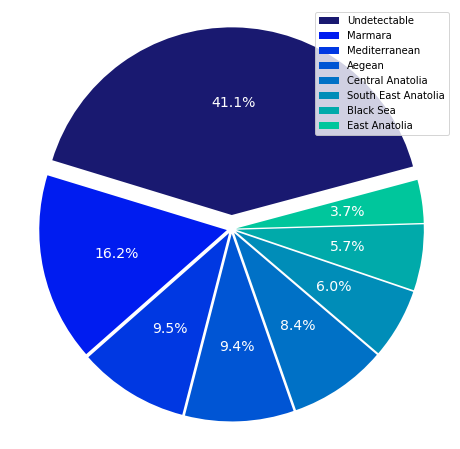

In [19]:
counts = pd.Series([1222, 482, 282, 278, 250, 179, 169, 110],index = ['','','','','','','',''] )

explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80','#00FF80' ,]
index1 = ['Undetectable','Marmara','Mediterranean','Aegean','Central Anatolia','South East Anatolia','Black Sea','East Anatolia']
counts.plot(kind='pie', fontsize=14, colors=colors, explode=explode,figsize = (8,8), autopct = "%1.1f%%" ,startangle = 15 ,textprops = dict(color = 'w'))
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=index1, loc="upper right")
plt.show()

<a id = "13"></a>
<font color = "#800000">
## *According To City Rates In Turkey Pie-Chart*

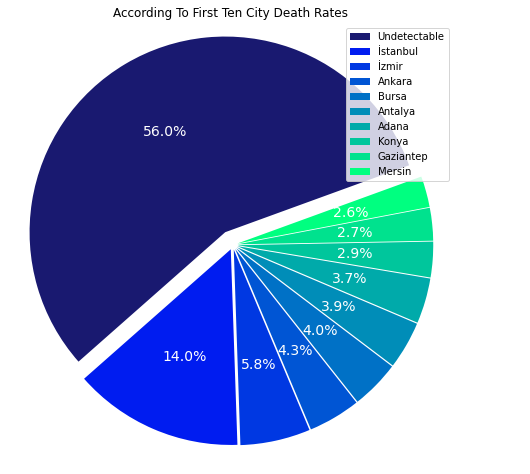

In [20]:
accordingtocities = data.city.value_counts().head(10)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80','#00FF80' ,]
explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025, 0.025,0.025)
cities = accordingtocities.plot(kind='pie'  , textprops = dict(color = 'w'),figsize = (8, 8),colors = colors ,explode = explode, startangle = 20 , shadow = False , autopct = "%1.1f%%", fontsize=14)
cities.set_title("According To First Ten City Death Rates")
cities.set_ylabel("" )
indexcities = ['Undetectable','İstanbul','İzmir','Ankara','Bursa','Antalya','Adana','Konya','Gaziantep' , 'Mersin' ]
plt.axis('equal')
plt.legend(labels = indexcities , loc = 'upper right' , fontsize = 10)
plt.ylabel('')
plt.show()

<a id = "14"></a>
<font color = "#800000">
## *According To Reason Rates Of Women Were Killed Pie-Chart*

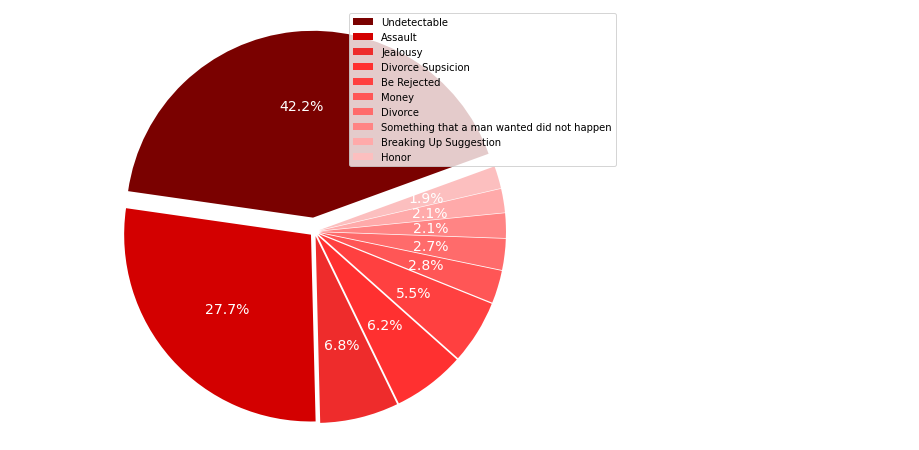

In [21]:
counts = data.why1.value_counts().head(10)
explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025,0.025,0.025)
colors = ['#7a0100', '#d30000', '#ee2c2c', '#ff3030', '#ff4040', '#ff5656', '#ff6b6b',
          '#ff8484', '#ffaaaa', '#fcbfbf','#00FF80' ,]
index = ['Undetectable','Assault','Jealousy','Divorce Supsicion','Be Rejected','Money','Divorce','Something that a man wanted did not happen','Breaking Up Suggestion','Honor']
counts.plot(kind='pie', fontsize=14, colors=colors, explode=explode,figsize = (11,8), autopct = "%1.1f%%" ,startangle = 20,textprops = dict(color = 'w') )
plt.axis('equal')
plt.ylabel('')
plt.legend(labels = index,loc = 'upper right')
plt.show()

<a id = '15'> </a>
## Resources

* https://www.hurriyet.com.tr
* https://www.sozcu.com.tr
* http://anitsayac.com

<a id = '16' > </a>
## Teammates

* Yağmur Sezen Demir yagmursezendemir@gmail.com
* Büşra Durak busradurakdl@gmail.com